# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns

# Functions definitions

In [7]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg
from Fonctions import plotlines_Xdf

# Read files : radiative budget, tas

In [3]:
# Download the amip dataframes and compute the radiative budget  

path = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename = "*_amip_*.nc"
variables=['rlut', 'rsut','rsdt','tas']
start_yr=1979
drop=True
year_list=range(1983,2014,1)
CNRM_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
start_yr=1979
drop=True
year_list=range(1983,2014,1)
MRI_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename = "standard_*_amip_*.nc"
start_yr=1950
drop=True
ignore=range(1979,1983,1)
year_list=[ind for ind in range(1950,2014,1) if ind not in ignore]
CAN_amip = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
CAN_amip

,rlut,rsut,rsdt,tas,F,H,N
0,239.539749,98.076698,340.433502,287.532043,340.433502,337.616455,2.817047
1,239.705215,98.474907,340.438812,287.607605,340.438812,338.180115,2.258698
2,239.299316,98.437309,340.444580,287.514221,340.444580,337.736633,2.707947
3,239.221283,98.770966,340.363190,287.448669,340.363190,337.992249,2.370941
4,239.686417,97.925217,340.341614,288.130890,340.341614,337.611633,2.729980


In [11]:
# Download the amip-futuer4K dataframes and compute the radiative budget  

path = "/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/"
filename = "*_amip-future4K_*.nc"
variables=['rlut', 'rsut','rsdt','tas']
start_yr=1979
drop=True
year_list=range(1983,2014,1)
CNRM_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/MRI-ESM2-0/amip/"
start_yr=1979
drop=True
year_list=range(1983,2014,1)
MRI_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)

path = "/data/scratch/globc/peatier/CMIP6/CanESM5/amip/"
filename = "standard_*_amip-future4K_*.nc"
start_yr=1950
drop=True
ignore=range(1979,1983,1)
year_list=[ind for ind in range(1950,2014,1) if ind not in ignore]
CAN_future4K = get_wavg_budget_df(path, filename, variables, start_yr, drop, year_list)
CAN_future4K

,rlut,rsut,rsdt,tas,F,H,N
0,247.774429,95.457008,340.433502,292.473480,340.433502,343.231445,-2.797943
1,247.545502,95.825897,340.438812,292.442139,340.438812,343.371399,-2.932587
2,247.553879,95.849030,340.444580,292.388214,340.444580,343.402893,-2.958313
3,247.550537,96.400681,340.363190,292.355408,340.363190,343.951233,-3.588043
4,247.493759,95.098251,340.341614,292.911499,340.341614,342.592010,-2.250397


# Create plot

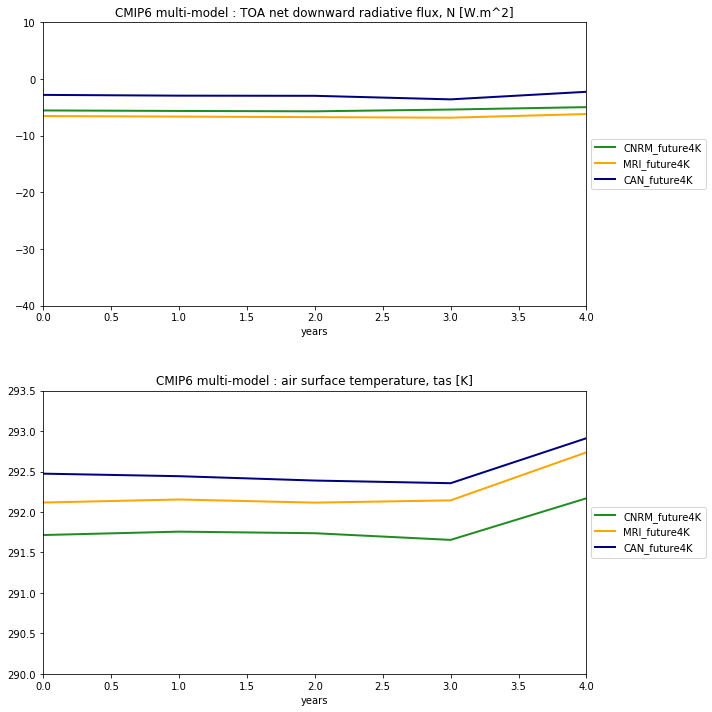

In [17]:
# PARAMETERS :
df=[None]*3
df[:] = [CNRM_future4K, MRI_future4K, CAN_future4K]
cmap = plt.get_cmap('ocean')
colors = ['forestgreen', 'orange', 'navy']
linewidth = [2.0, 2.0, 2.0]

xlabel = 'years'
xmin = 0
xmax = 4
legend = ['CNRM_future4K', 'MRI_future4K', 'CAN_future4K']

# Plot of lines from different dataframes
plt.subplots(figsize=(10,10)) 

plt.subplot(211)
title = 'CMIP6 multi-model : TOA net downward radiative flux, N [W.m^2]'
y = 'N'
ymin = -40.0
ymax = 10.0
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

plt.subplot(212)
title='CMIP6 multi-model : air surface temperature, tas [K]'
y = 'tas'
ymin = 290.0
ymax = 293.5
plotlines_Xdf(df, y, title, colors, linewidth, xlabel, xmin, xmax, ymin, ymax, legend)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/longPPE_N_tas.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()